[[153  89]
 [187  88]
 [166  74]
 [172  85]
 [154  88]
 [175  82]
 [169  87]
 [163  92]
 [178  85]
 [180  90]
 [190  95]
 [192  98]
 [147  76]
 [132  70]
 [200  82]]
Sample size before clustering    :-  15
Cluster Node 1                   :- [0]
Cluster Node 2                   :- [4]
Progression(Current Sample)      :- [[[0, [4]]], [1], [2], [3], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]
Cluster attained                 :- [[0, [4]]]
Sample size after clustering     :- 14


Sample size before clustering    :-  14
Cluster Node 1                   :- [3]
Cluster Node 2                   :- [6]
Progression(Current Sample)      :- [[[0, [4]]], [1], [2], [[3, [6]]], [5], [7], [8], [9], [10], [11], [12], [13], [14]]
Cluster attained                 :- [[3, [6]]]
Sample size after clustering     :- 13


Sample size before clustering    :-  13
Cluster Node 1                   :- [10]
Cluster Node 2                   :- [11]
Progression(Current Sample)      :- [[[0, [4]]], [1], [2

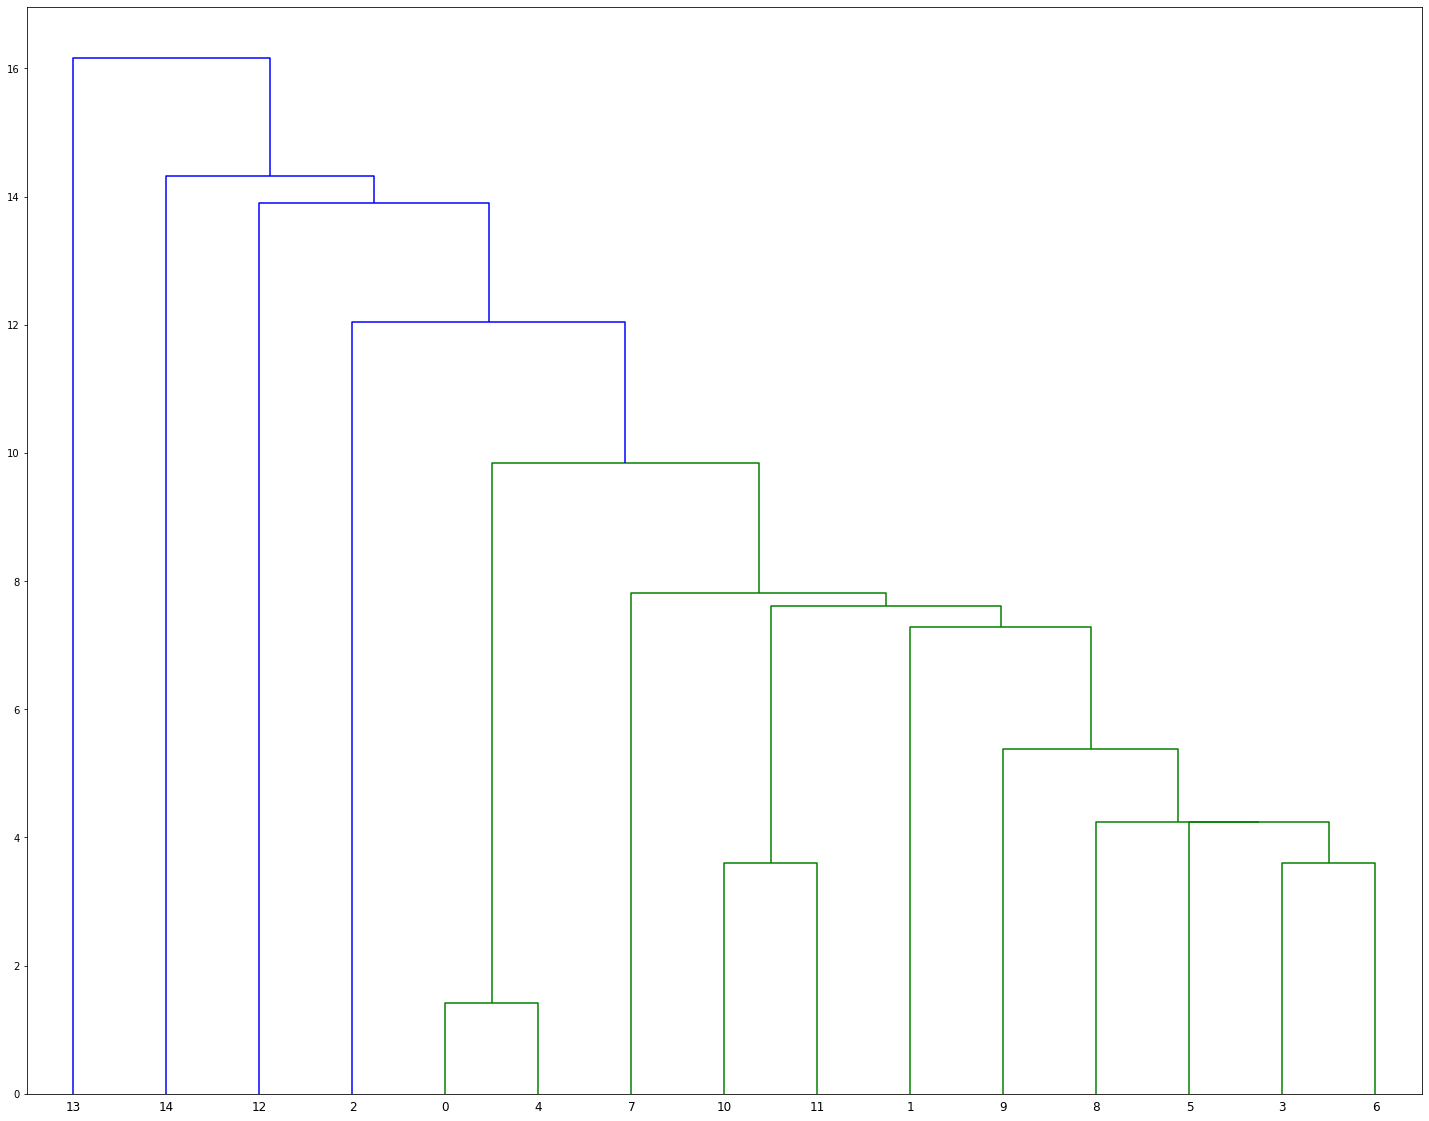

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = np.array([[153,89],
              [187,88],
              [166,74],
              [172,85],
              [154,88],
              [175,82],
              [169,87],
              [163,92],
              [178,85],
              [180,90],
              [190,95],
              [192,98],
              [147,76],
              [132,70],
              [200,82]
])

#print(X)

#data=pd.read_csv("bmi1.csv")
#CREAT A DATA FRAME
#X=data[["SepalLengthCm","PetalLengthCm"]]

#X = data.iloc[:,1:3].values

print(X)


class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10*4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                   dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                   dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)
    
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')
    
    
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 20))
dn = dendrogram(Z)